# EXPLORATORY DATA ANALYSIS

## Cardiotocographic Dataset

### 1. Dataset Overview

In [6]:
import pandas as pd

df = pd.read_csv("Cardiotocographic.csv")
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Findings :

    All columns are numerical

    No categorical datatype issues

    Dataset is well-structured

    Some columns contain float values with medical precision

In [12]:
df.isnull().sum()


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

### 2. Statistical Summary

In [15]:
df.describe()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


Key Statistical Insights:

    1. Baseline Fetal Heart Rate (LB):

        a. Mean ≈ 133 bpm

        b. Values fall largely within normal fetal heart rate range (110–160)

        c. Low standard deviation → stable baseline rates

    2. Variability Measures:

        a. ASTV (Abnormal Short-Term Variability):

            i. High max values (up to 87%)

            ii. Strong indicator of fetal stress

        b. MSTV & MLTV:

            i. Lower values often associated with abnormal fetal conditions

    3. Decelerations (DL, DS, DP):

        a. Median = 0

        b. Indicates decelerations are rare but clinically significant when present

#### Interquartile Range (Dispersion)

In [20]:
IQR = df.quantile(0.75) - df.quantile(0.25)
IQR


LB          14.000000
AC           0.005650
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

Observation

    a. High IQR for ASTV, ALTV, Width

    b. Indicates large variability across fetal conditions

### 3. Data Visualization

#### Histograms (Distribution Analysis)

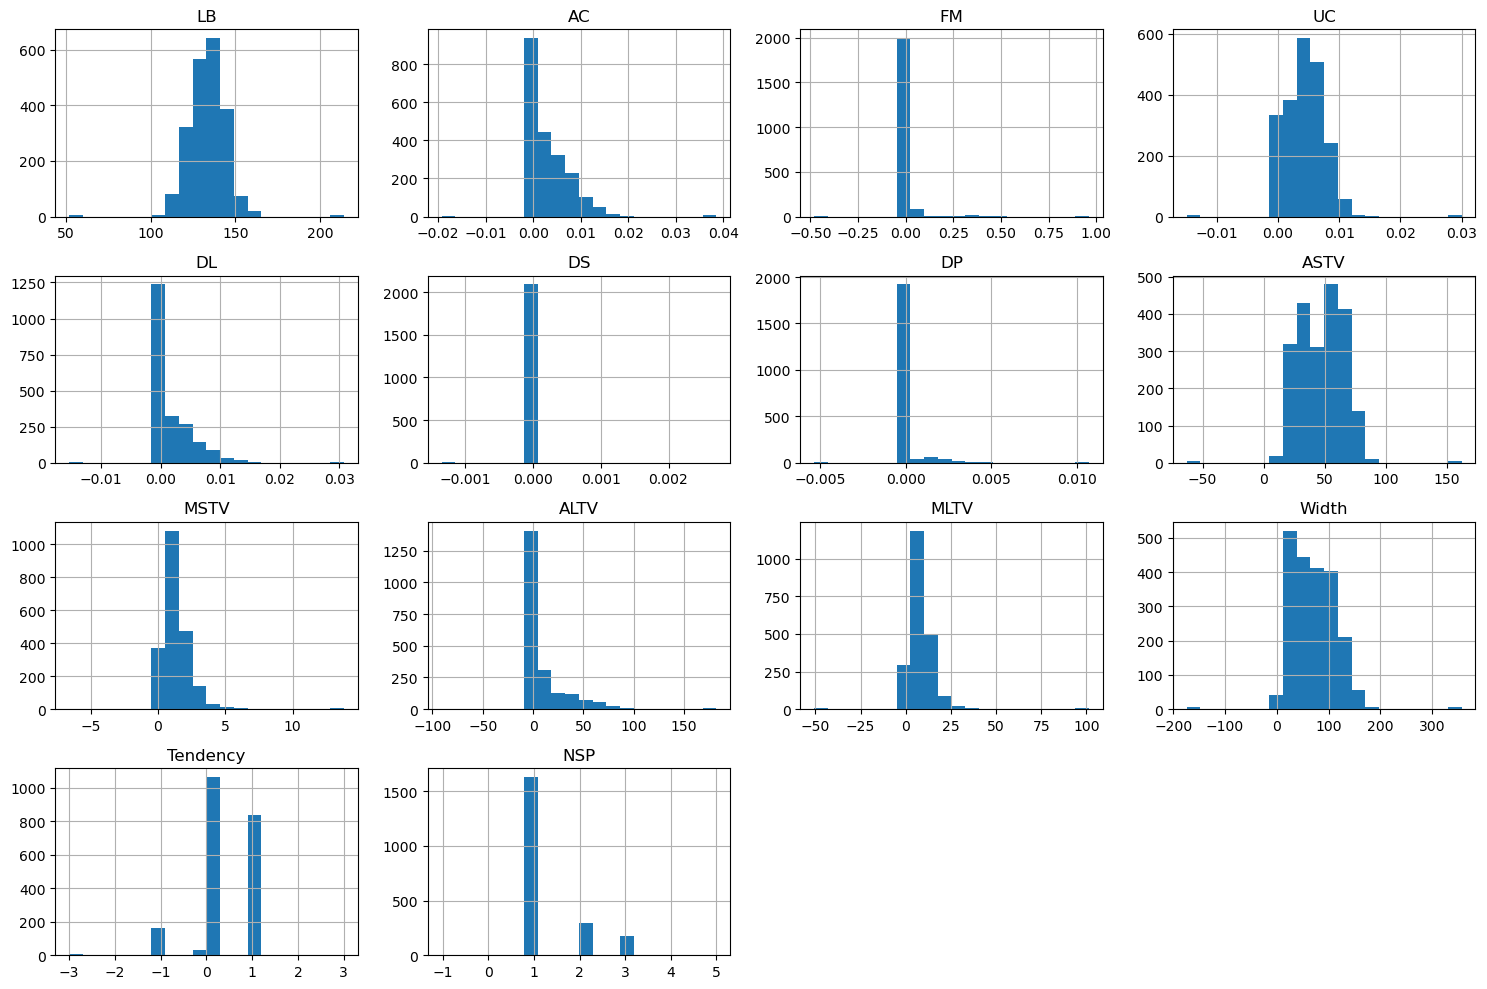

In [25]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()


Insights

    a. Many variables are right-skewed

    b. Variables like DP, DL, DS have heavy concentration near zero

    c. ASTV & ALTV show long tails → abnormal cases

#### Boxplots (Outlier Detection)

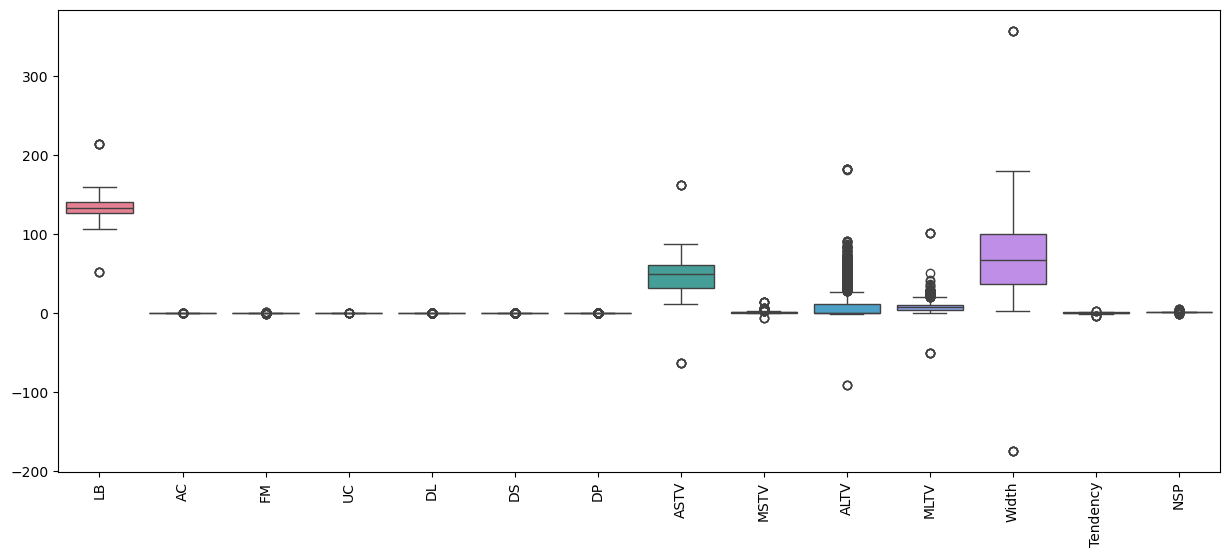

In [30]:
import seaborn as sns

plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


Findings:

    a. Clear outliers in:

        i. ASTV

        ii. ALTV

        iii. Width

    b. These are clinically meaningful, not data errors

#### Correlation Heatmap

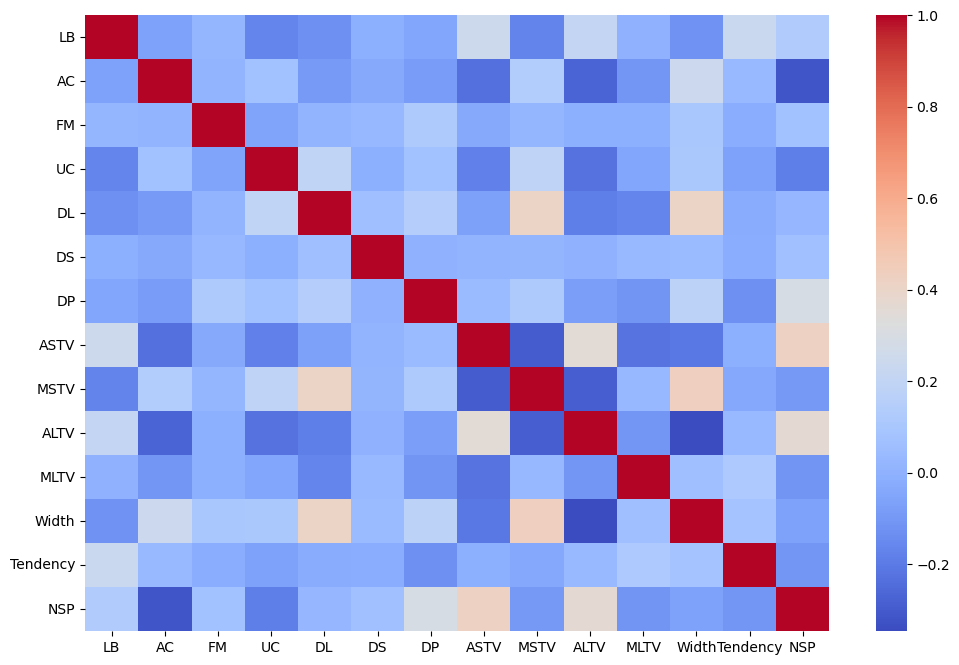

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()


Strong Relationships Observed:

    a. ASTV ↔ MSTV → strong negative correlation

    b. ALTV ↔ MLTV → strong negative correlation

    c. UC ↔ Decelerations (DL, DP) → positive correlation

#### Pair Plot (Advanced Visualization)

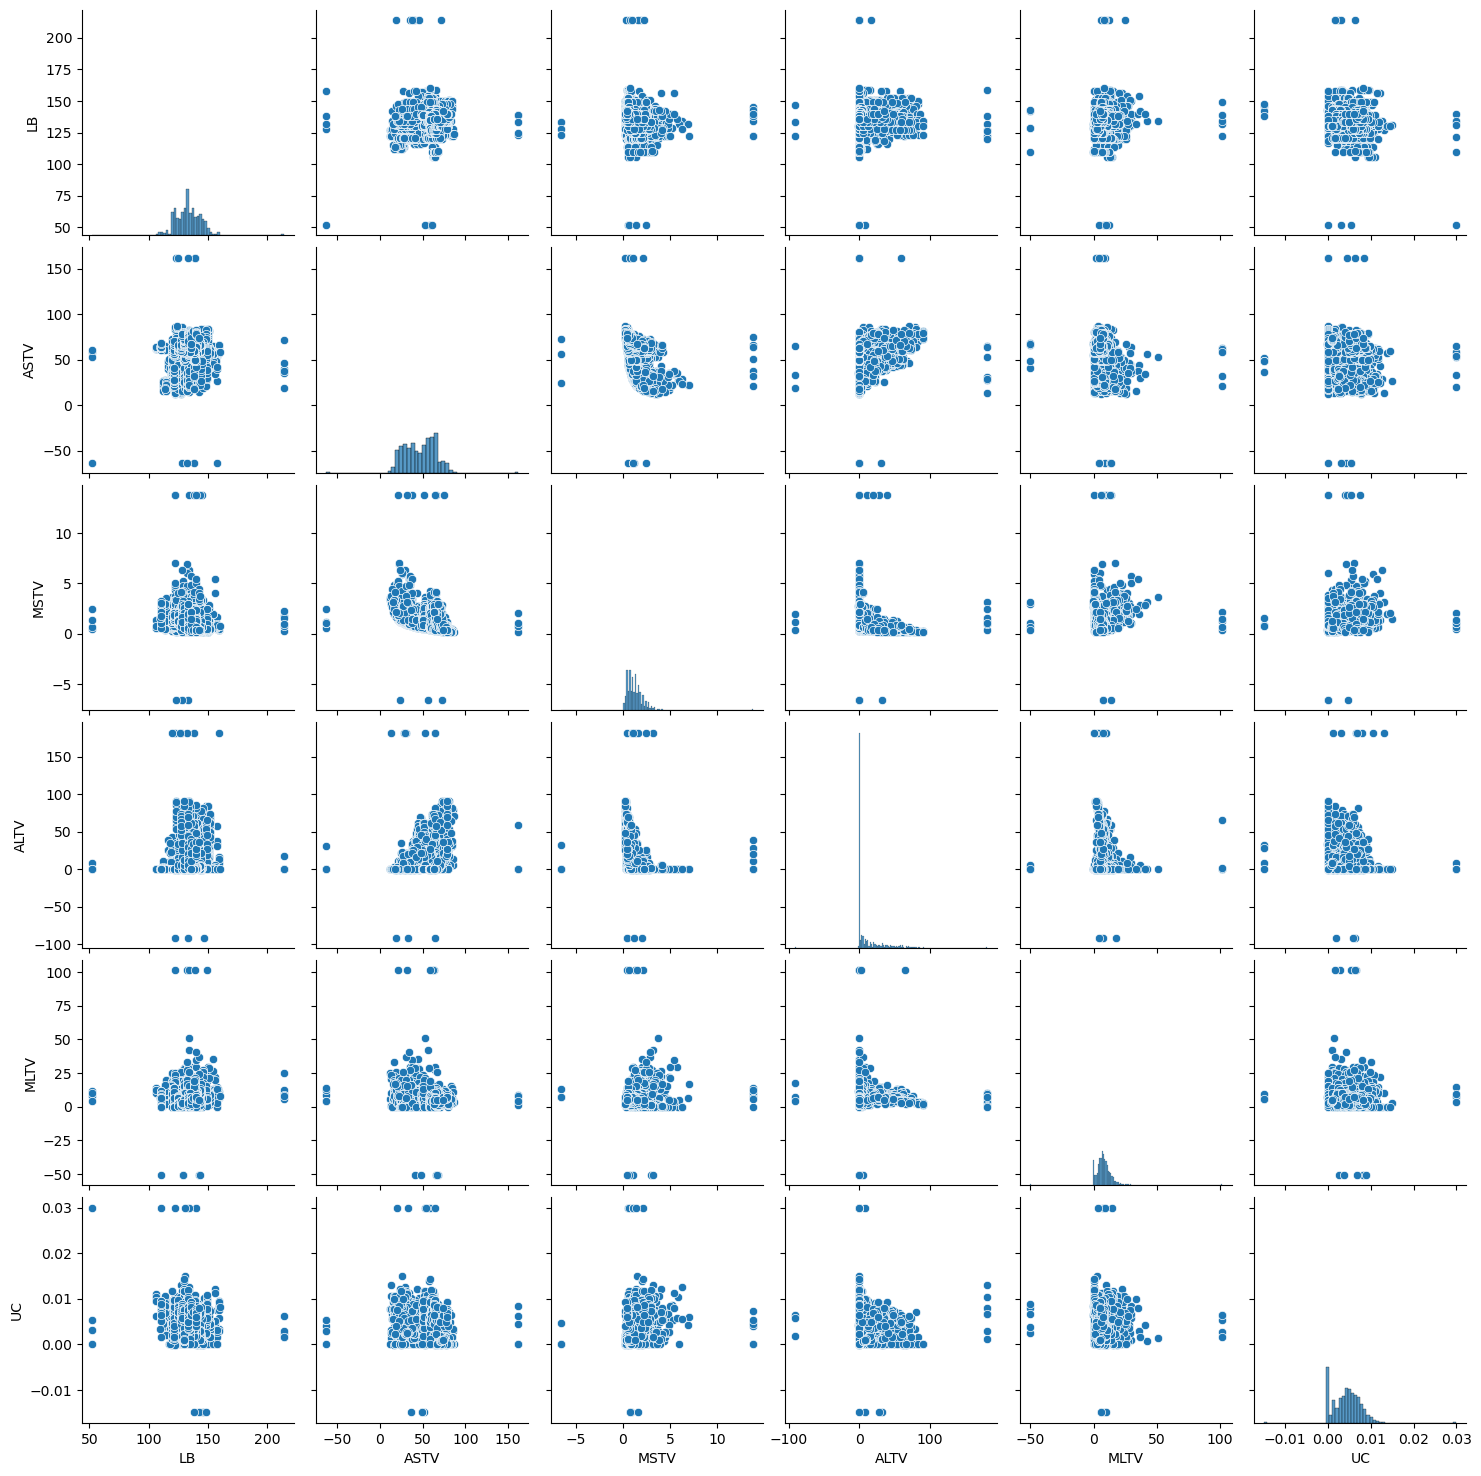

In [41]:
sns.pairplot(df[['LB','ASTV','MSTV','ALTV','MLTV','UC']])
plt.show()


Insight:

    a. Clear clustering between normal and abnormal variability patterns

    b. Suggests suitability for classification models

#### Violin Plot (Distribution Depth)

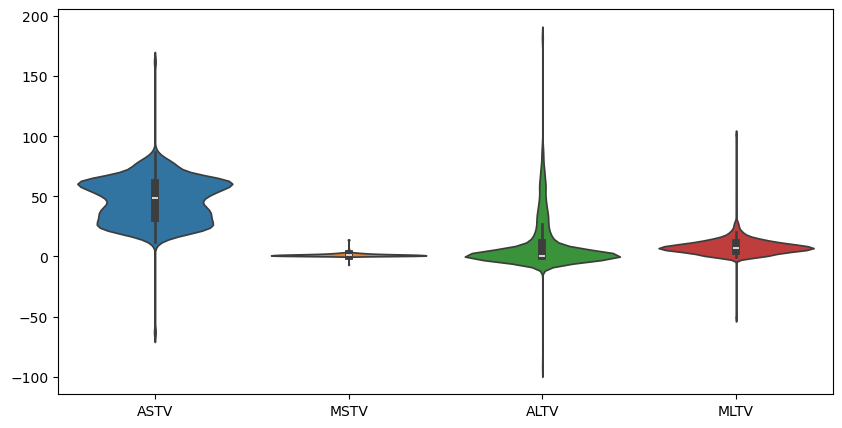

In [45]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df[['ASTV','MSTV','ALTV','MLTV']])
plt.show()


Interpretation

    a. Abnormal variability metrics have wide density spread

    b. Indicates diverse fetal conditions in dataset

### 4. Pattern Recognition & Insights

✔ Observed Patterns

High ASTV / ALTV → Low MSTV / MLTV

Increased uterine contractions (UC) → more decelerations

Extreme values correspond to pathological fetal states

✔ Clinical Relevance

Variability features are strong fetal distress indicators

Decelerations, though rare, are high-risk markers

#### 5. Conclusion (Data-Driven)
Summary of Findings

    a. Dataset is clean, complete, and analysis-ready

    b. Variability-related features dominate fetal condition assessment

    c. Strong correlations exist between variability and distress indicators

    d. Outliers represent critical medical cases, not noise

Impact

    Suitable for:

        Fetal risk classification

        Early distress detection

        Machine learning models (Logistic, SVM, Random Forest)